In [3]:

%%javascript

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-k', {
    help : 'move up selected cells',
    help_index : 'jupyter-notebook:move-selection-up',
    handler : function (event) {
        IPython.notebook.move_selection_up();
        return false;
    }}
);

IPython.keyboard_manager.command_shortcuts.add_shortcut('Ctrl-j', {
    help : 'move down selected cells',
    help_index : 'jupyter-notebook:move-selection-down',
    handler :  function (event) {
        IPython.notebook.move_selection_down();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inline as inline

%matplotlib inline

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 100)

pd.options.mode.chained_assignment = None

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv('events.csv', low_memory = False)


## Analisis del evento "lead"

Veremos como se comporta los usuarios que accedieron a este evento de la pagina.

In [3]:
lead = (df.loc[df['event'] == 'lead'])['person']
df_lead_users = df.loc[df.person.isin(lead)]
df_lead_users.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,63887,63887,63887,3881,34000,34448,34000,34000,34000,17265,3060,410,3882,2283,5529,5529,5529,5529,5529,5529,5529,5529,5529
unique,56926,11,291,148,1947,181,5,8,61,6736,733,12,19,3,6,2,278,27,5,3,47,35,81
top,2018-03-21 01:11:52,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"3371,6357,6371,2777,3191,6791,2718,2725,6399,3...",J7,CustomerService,google,Google,Direct,Returning,Unknown,Sao Paulo,Brazil,Computer,360x640,Windows 7,Chrome 66.0
freq,6,32907,2771,1362,259,2558,14599,12286,8984,62,109,226,2258,2221,1830,5243,1006,1152,5376,2813,1949,1329,1032


Vemos que solo 291 personas lo utilizaron

In [16]:
event_counts_lead= df_lead_users.event.value_counts()
checkout_vs_conversion = event_counts_lead.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing'])
event_counts_lead

viewed product       32907
brand listing         9439
visited site          5529
generic listing       4381
ad campaign hit       3887
searched products     3510
search engine hit     2283
checkout               969
lead                   448
staticpage             410
conversion             124
Name: event, dtype: int64

Tambien vemos que de esas 291 personas se realizaron 124 conversion lo que es un muy buen valor dada la proporcion

Text(0,0.5,'Event Name')

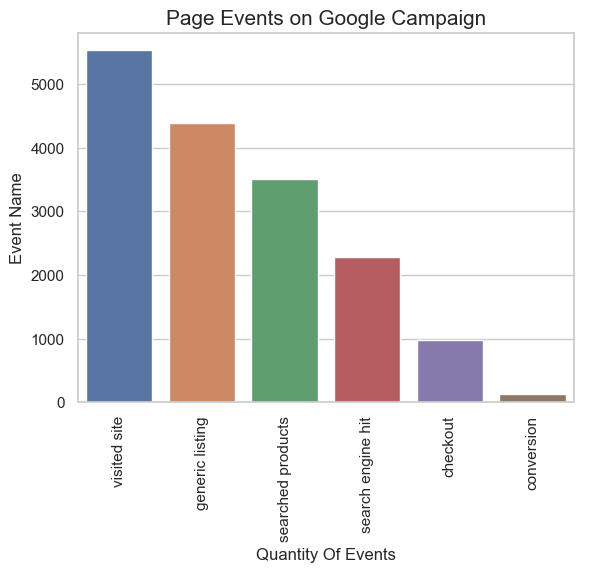

In [17]:
g = sns.barplot(x=checkout_vs_conversion.index, y=checkout_vs_conversion.values, orient='v')
plt.xticks(rotation=90)

g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)

De la misma forma estos valores siguen siendo bajos con respecto a los checkout

In [23]:
conversion_person_lead =(df_lead_users.loc[df_lead_users['event'] == 'conversion'])['person'].drop_duplicates()
df_lead_users_conversion = df_lead_users.loc[df_lead_users['person'].isin(conversion_person_lead)]
event_counts_lead_conversion= df_lead_users_conversion.event.value_counts()
event_counts_lead= df_lead_users.event.value_counts()
checkout_vs_conversion_lead = event_counts_lead_conversion.drop(labels=['ad campaign hit', 'viewed product','staticpage','lead', 'brand listing'])
event_counts_lead


viewed product       32907
brand listing         9439
visited site          5529
generic listing       4381
ad campaign hit       3887
searched products     3510
search engine hit     2283
checkout               969
lead                   448
staticpage             410
conversion             124
Name: event, dtype: int64

In [395]:
conversion_person_lead.describe()

count          124
unique          58
top       a0d4baef
freq            11
Name: person, dtype: object

De las 291 personas 58 decidieron comprar, y al tener 124 compras vemos que muchos compraron mas de una vez!


Text(0,0.5,'Event Name')

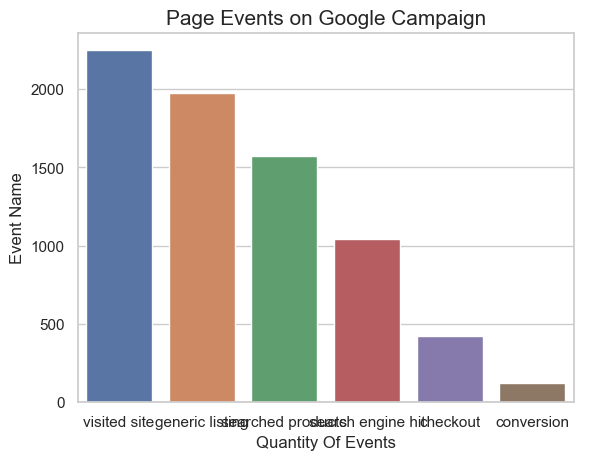

In [25]:
g = sns.barplot(x=checkout_vs_conversion_lead.index, y=checkout_vs_conversion_lead.values, orient='v')
g.set_title("Page Events on Google Campaign", fontsize=15)
g.set_xlabel("Quantity Of Events", fontsize=12)
g.set_ylabel("Event Name", fontsize=12)

Haciendo los mismos pasos que hicimos en la campaña la conversion sigue siendo notoriamente menor a los checkouts aunque sean personas que realizaron compras